# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h1>Содержание<span class="tocSkip"></span></h1>

1. [Изучение данных из файла](#старт)
    - 1.1.  [импорт библиотек](#импорт)
    - 1.2.  [изучение файла](#изучение)
    - 1.3.  [вывод](#вывод1.3)
2. [Предобработка данных](#предобработка)
    - 2.1.  [Замените названия столбцов (приведите к нижнему регистру](#регистр)
    - 2.2.  [Замена типа данных](#замена)
    - 2.3.  [Обработка пропусков](#пропуск)
    - 2.4.  [Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец](#продажи)
    - 2.5.  [вывод](#вывод2.5)
3. [Проведем исследовательский анализ данных](#анализ)
    - 3.1. [Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?](#год)
    - 3.2. [Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним за какой характерный срок появляются новые и исчезают старые платформы?](#платформа)
    - 3.3. [Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.](#топ)
    - 3.4. [Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.](#ящик)
    - 3.5.[Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.](#корреляция)
    -  3.6. [Соотнесите выводы с продажами игр на других платформах.](#вывод3.6)
    - 3.7. [Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?](#жанр)
4. [Составьте портрет пользователя каждого региона](#регион)
    - [Самые популярные платформы (топ-5). Опишите различия в долях продаж.](#)
    - [Самые популярные жанры (топ-5). Поясните разницу.](#)
    - [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#)
5. [Проверим гипотезы](#гипотеза) 
    -  [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;](#гипотеза_1)
    -  [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#гипотеза_2)
6. [Общий вывод](#вывод)
7. [Чек-лист готовности проекта](#лист)

## Изучение данных из файла
<a id="старт"></a>

### импорт библиотек
<a id="импорт"></a>

In [1]:
import pandas as pd# импорт библиотеки pandas
import numpy as np #Импорт модуля numpy. numpy работает с однородными многомерными массивами (матрицами).
import pathlib #Импорт модуля pathlib. Модуль Pathlib в Python упрощает работу с файлами и папками.
from pathlib import Path
from IPython.display import display #импортируем метод display из библиотеки IPython.display
import matplotlib.pyplot as plt #Импорт модуля matplotlib
import seaborn as sns

from scipy import stats as st

### Открываем исходные данные
<a id="изучение"></a>

In [2]:
data=pd.read_csv('/datasets/games.csv')# чтение файла с данными с сохранением в data

In [3]:
data.head(10)# получение первых 10 строк таблицы data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isnull().sum() # определение количества NaN элементов в записях (Ожидаемые)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
data.nunique() # количество уникальных значений для каждого столбца .

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

In [7]:
data.duplicated().sum()# получение суммарного количества дубликатов в таблице data

0

### Вывод
<a id="вывод1.3"></a>

Исходный датафрейм - data, содержит 11 признаков и 16715  объекта, есть пропуски. Типы данных столбцов:float64(6), object(5). Память занимает 1,4+ MB.
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.       

В столбцах обнаружены пропущенные значения: Name - 2, Year_of_Release - 269, Genre - 2, Critic_Score - 8578, User_Score - 6701, Rating - 6766, в остальных столбцах NaN не обнаружено.

Проанализируем, с чем могут быть связаны пропуски:
- забыли заполнить поле;
- данные были потеряны при переносе вручную из устаревшей базы данных;
- произошла ошибка программирования;
- решили не заполнять поле;
- рейтинги не определялись (компания ESRB начала свою деятельность в 1994 г).

Столбец User_Score имеет тип данных object, в то время как должен быть числовым.

Названия столбцов нужно привести к одному нижнему регистру.

## Предобработка данных
<a id="предобработка"></a>

### Заменим названия столбцов
<a id="регистр"></a>

In [8]:
data.columns=data.columns.str.lower()#спомощью функции str.lower понизим регистр букв в назнание столбцов

###  Замена типа данных 
Преобразуем данные в нужные типы. 
<a id='замена'></a>

Как было сказано в выводах есть два параметра, которые требуют замены типа данных:
- year_of_release    float64 необходимо заменить на целочисленный (int), т.к. года не могут быть дробным числом.
- user_score  object - на вещественный тип. Выяснить сначала откуда появился нынешний тип.

Для замены типа данных в столбце year_of_release в начале проанализируем пропущенные значения.
Отсуртируем таблицу по пропущенным значениям в годах. 

In [9]:
data.loc[(data['year_of_release'].isnull())]#выберем строки в дф с пропущенными значениями в столбце год выпуска

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Посмотрим в каких строках нет данных по году, оценки критика, пользователя и рейтинга

In [10]:
data.loc[(data['year_of_release'].isnull())&(data['critic_score'].isnull())&(data['user_score'].isnull())]#изменили условия выборки

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16079,Football Manager 2007,X360,NaN,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16329,Brothers in Arms: Furious 4,X360,NaN,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


Удалим эти строки, т.к. они информации в них нет. Сумма продаж невелика, на дальнейшем исследование практически не скажется.

In [11]:
data.drop(data.loc[(data['year_of_release'].isnull())&(data['critic_score'].isnull())&(data['user_score'].isnull())].index, inplace=True)#удаление спомощью функции drop() 
#data.loc[(data['year_of_release'].isnull())]#проверка

Данные разные, нет повторяющейся закономерности. Посмотрим еще срез, в найденных пропусках по годам, по наименованию игр, может быть получится заполнить пропуски через названия игр.

In [12]:
display(data.loc[(data['name']=="LEGO Batman: The Videogame")], data.loc[(data['name']=="Virtua Quest")], data.loc[(data['name']=="Rock Band")])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15754,Virtua Quest,PS2,NaN,Role-Playing,0.01,0.01,0.0,0.0,53.0,7.6,T
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.00,0.0,0.0,55.0,5.5,T


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1840,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


Идея оказалась не удачной. Для  игр нет пересекающихся данных. Если названия совпадают, то платформы разные и поэтому года могут не совпадать. Для некоторых названий для всех игр  отсутствует год. Отбросим эту идею.

Может быть группировка по платформам и жанрам нам поможет?

In [13]:
display(data.loc[(data['platform']=="PS2")&(data['genre']=="Misc") ], data.loc[(data['platform']=="PS2")], data.loc[(data['platform']=="X360")])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
196,Guitar Hero II,PS2,2006.0,Misc,3.81,0.63,0.00,0.68,92.0,8.5,T
208,Guitar Hero III: Legends of Rock,PS2,2007.0,Misc,3.49,0.01,0.01,1.48,82.0,8.2,T
275,EyeToy Play,PS2,2003.0,Misc,0.88,2.30,0.20,0.83,80.0,7.5,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
497,Sonic Mega Collection Plus,PS2,2004.0,Misc,1.54,1.14,0.00,0.22,73.0,8.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16384,Rakushou! Pachi-Slot Sengen 6: Rio 2 Cruising ...,PS2,2009.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16397,Rakushou! Pachi-Slot Sengen 4,PS2,2006.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16439,Ultimate Board Game Collection,PS2,2006.0,Misc,0.01,0.00,0.00,0.00,37.0,tbd,E
16444,Idol Janshi Suchie-Pai IV,PS2,2007.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E
38,Grand Theft Auto III,PS2,2001.0,Action,6.99,4.51,0.30,1.30,97.0,8.5,M
48,Gran Turismo 4,PS2,2004.0,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E
...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16671,Kanokon: Esuii,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16689,Real Rode,PS2,2008.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M
32,Call of Duty: Black Ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012.0,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T
16622,World Snooker Championship 2007,X360,2007.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16647,Metal Gear Solid HD Edition,X360,2011.0,Action,0.00,0.00,0.01,0.00,NaN,tbd,M
16654,Ben 10 Omniverse 2,X360,2013.0,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+


Опять мимо. Слишком разные временные промежутки для одной и той же платформы.
Пропущенные года заменим на ноль, как отсутствующие. Тип данных заменим на целостный, т.к. кроме года ничего неизвестно.
Пропущенные значения в critic_score, user_score  и rating нужно подумать чем заменять.

In [14]:
data['year_of_release'] = data['year_of_release'].fillna(value=0)# замена пропущенных значений 
data['year_of_release'] =data['year_of_release'].astype('int32')# замена типа данных

### Обработка пропусков
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;

<a id='пропуск'></a>

Посмотрим на пропуски в название игры.

In [15]:
data_name=data.loc[(data['name'].isnull())]
data_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих двух строках отсутсуют кроме названия игры, жанр игры, оценка критика, оценка пользователя и рейтинг от организации ESRB. Суммарные значения по продажам таковы, что если мы удалим эти две строки, то это останется незамечаным.
Принимаю решение удалить эти две строки.

In [16]:
data.drop(data.loc[(data['name'].isnull())].index, inplace=True) #удаление строк

Для удобства создадим новую таблицу и посмотрим что с пропусками по рейтингам.

In [17]:
data_score=data.loc[(data['critic_score'].isnull())&(data['user_score'].isnull())]#сформировали новый дф, чтобы лучше понять пропуски по рейтингам
data_score.isnull().sum() 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6572
user_score         6572
rating             6534
dtype: int64

In [18]:
data_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Интересно, по трем параметрам совпадают пропущенные значения. Если бы при этом года были до 1994 г. можно было бы предположить, что  еще рейтинги не собирали. Но в таблице есть года и после 1994 г. Наверное, отсутствие рейтинга в более позднем периоде, связано с тем, что по какой-либо причине рейтинг был не поставлен, или данные не были внесены в таблицу, или произошел сбой в системе.

Что же делать? Оставлять так как есть нельзя, т.к. невозможно будет считать рейтинги и оценки критиков и пользователей. Заменить их нулями - нельзя, т.к. это повляет на итоговые значения и внесет ошибки при анализе ведь рейтинг может быть нуливым.
Известно, что оценка критиков - максимум 100,  оценка пользователей - максимум 10, поэтому заменим пропущенные значения на 101 и 11 соответственно.
В 'rating' пропущенные значения заменим на 'no_mark' - нет оценки.

In [19]:
data['critic_score'] = data['critic_score'].fillna(value=101) #замена пропусков
data['user_score'] = data['user_score'].fillna(value=11) #замена пропусков
data['rating'] = data['rating'].fillna(value='no_mark') #замена пропусков

При анализе входных данных user_score определился, как объект. Проверим почему. 

In [20]:
data['user_score'].unique()# список уникальных значений, выявленных специальным методом в столбце 'user_score'

array(['8', 11, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. 

In [21]:
data.query('user_score == "tbd"')# отсортируем таблицу по условию 'user_score == "tbd"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,101.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,101.0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,101.0,tbd,E


Т.к. под аббревиатурой tbd скрывается тот же пропуск, то заменим его на индекс 11, который мы ввели ранее.

In [22]:
data.loc[(data['user_score']=="tbd")] = data.loc[(data['user_score']=="tbd")].replace(to_replace = "tbd", value = 11) # замена tbd в столбце 'user_score' на 11

In [23]:
data = data.astype({"user_score":'float32', "other_sales":'float32', "critic_score":'float32'})# замена  типа данных на вещественный 
data.head()#выведем дф

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,11.0,no_mark
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101.0,11.0,no_mark


### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
<a id='продажи'></a>

In [24]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']#посчитаем сумму продаж в регионах, новое значение запишем в новый столбец 'all_sales'
data.head(10)#проверим, выведем дф

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,11.0,no_mark,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101.0,11.0,no_mark,30.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,101.0,11.0,no_mark,29.68
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,26.08
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,101.0,11.0,no_mark,27.84


In [25]:
data.info()#итоговая проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16624 entries, 0 to 16714
Data columns (total 12 columns):
name               16624 non-null object
platform           16624 non-null object
year_of_release    16624 non-null int64
genre              16624 non-null object
na_sales           16624 non-null float64
eu_sales           16624 non-null float64
jp_sales           16624 non-null float64
other_sales        16624 non-null float32
critic_score       16624 non-null float32
user_score         16624 non-null float32
rating             16624 non-null object
all_sales          16624 non-null float64
dtypes: float32(3), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


### Вывод
<a id="вывод2.5"></a>

В столбцах year_of_release, user_score была проведена замена типов данных.

Проведен анализ причин пропусков в name, genre, year_of_release, critic_score, user_score, rating.
Пропуски в name, genre, critic_score, user_score и rating совпали и т.к. на показатель продаж сильного влияния не оказывало, то эти строки были удалены.

Пропуски в year_of_release были заменены на ноль и 89 строк были удалены, т.к. в них отсутствовали кроме года и оценка критиков, пользователей и рейтинг ESRB.

Пропуски в critic_score, user_score, rating также практически совпали. При этом продажи проходили в разных регионах и в разные годы, в разных жанрах и на разных платформах. Видимо, пропуски в рейтингах связаны с отсутствием данных по рейтингам или с их потерей по тем или иным причинам.

## Проведем исследовательский анализ данных
<a id="анализ"></a>

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
<a id="год"></a>
<a id="preprocessing"></a>

In [26]:
data_year=data.pivot_table(index=['year_of_release'],values='name',aggfunc=('count'))#создадим новый дф data_year, отсортировав на году
data_year#посмотрим на него

,name
year_of_release,
0,180
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


Text(0, 0.5, 'Количество компьютерных игр')

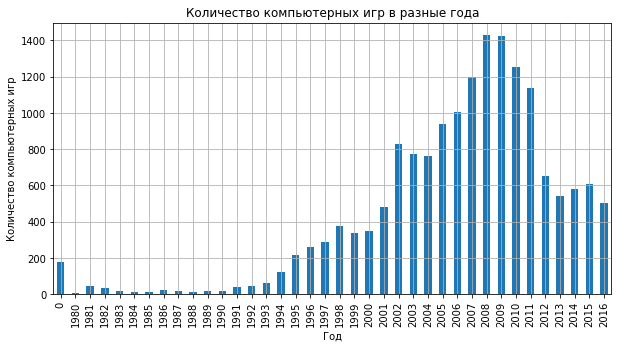

In [27]:
data_year.groupby('year_of_release')['name'].mean().plot(x='year_of_release',y='name', kind='bar',  grid=True,figsize=(10,5))#стоим график
plt.title('Количество компьютерных игр в разные года')
plt.xlabel("Год")
plt.ylabel("Количество компьютерных игр")

До 1995 г. было выпущено до 3%, рассматриваемых нами компьютерных игр. Объясняется данная тенденция тем, что персональные компьютеры были еще мало распространены. Поэтому данные ранее 1995 г. отбросим из нашего дальнейшего анализа. 

Наибольшее количество компьютерных игр было продано в период с 2007 по 2011 года.

In [28]:
data_good=data.query('1995<year_of_release')#делаем срез и результат поместим в новую таблицу

### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним за какой характерный срок появляются новые и исчезают старые платформы?
<a id="платформа"></a>

In [29]:
data_platform=data_good.pivot_table(index=['platform', 'year_of_release'], values=['all_sales'],aggfunc=('sum')) #сортируем, результат помещаем в дф data_platform
data_platform['years'] =  data_platform.index # спомощью DF.index, возвратили объект Index в новый столбец 'years'
data_platform['years'] = data_platform['years'].apply (lambda row: row[1]).astype('int') #изменили тип данных
data_platform #вывели результат 

all_sales  years
platform year_of_release                  
3DS      2011                 58.80   2011
         2012                 48.77   2012
         2013                 53.97   2013
         2014                 41.75   2014
         2015                 26.75   2015
...                             ...    ...
XB       2008                  0.17   2008
XOne     2013                 17.21   2013
         2014                 49.26   2014
         2015                 54.67   2015
         2016                 23.91   2016

[179 rows x 2 columns]

Text(0, 0.5, 'Количество продаж')

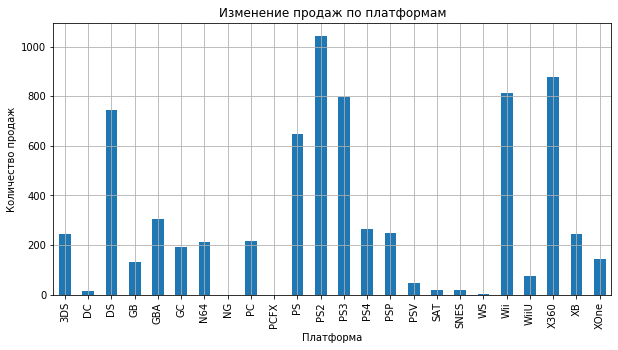

In [30]:
data_platform.groupby('platform')['all_sales'].sum().plot(x='platform',y='all_sales', kind='bar',  grid=True,figsize=(10,5)) #построили график
plt.title('Изменение продаж по платформам')
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

In [31]:
data_platform.groupby('platform')['all_sales'].sum().sort_values(ascending=False). head(6) #отсортировали дф по 'platform' и отсортировали полученный результат

platform
PS2     1043.09
X360     876.36
Wii      813.47
PS3      796.75
DS       743.72
PS       647.26
Name: all_sales, dtype: float64

Самыми популярными играми являются PS2, X360, Wii, PS3, DC и PS.

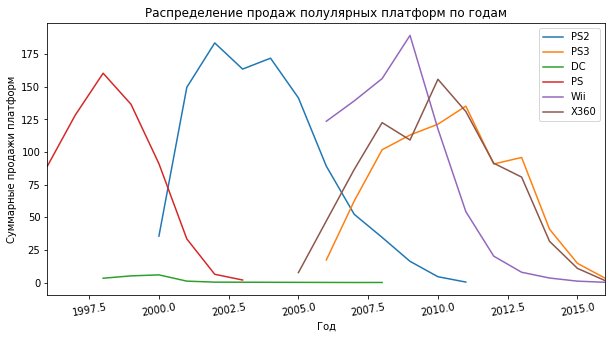

In [32]:
list_platform=['PS2','PS3','DC','PS','Wii','X360'] #сформировали список с самыми популярными играми
top_platform=data_platform.query('platform in @list_platform') #отсортировали дф data_platform по списку list_platform с самыми популярными играми
fig, ax = plt.subplots(figsize =(10,5)) #строим графики
for i in list_platform: #переменная, которая перебирает популярные игры в списке
    top_platform.loc[i].plot(x="years", y="all_sales", kind="line", ax=ax, rot=10, fontsize=10) #строим график для каждой переменной цикла
ax.legend(list_platform,prop = {'size':10})
plt.title('Распределение продаж полулярных платформ по годам')
plt.xlabel("Год")
plt.ylabel("Суммарные продажи платформ")
plt.show()    

В среднем 10 лет до полного исчезновения платформы.

Text(0, 0.5, 'Суммарные продажи платформ')

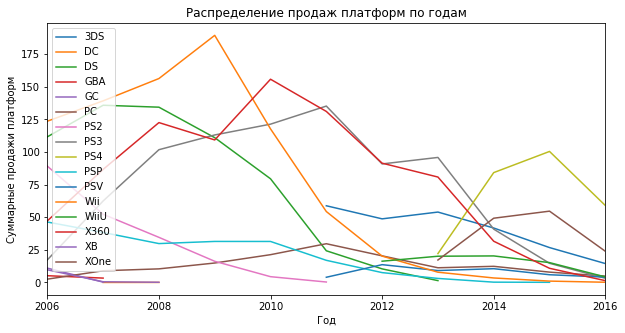

In [33]:
period_data = data_good.query('2005<year_of_release') # сделаем срез и поместим в новую таблицу  period_data все строки с годами позже 2005 года

period_data_good=period_data.groupby(['year_of_release', 'platform'])['all_sales'].sum() #отсортируем таблицу по 'year_of_release', 'platform'
period_data_good.unstack().plot(figsize=(10,5))#спомощью функции unstack - избавляемся от уровня и добавляет его к столбцам, строим графики
plt.legend(loc='upper left')
plt.title('Распределение продаж платформ по годам')
plt.xlabel("Год")
plt.ylabel("Суммарные продажи платформ")

После 2014 года новых платформ не выпускается. 
Бум на компьютерные игры начинает уменьшаться с 2012 года. В 2013 году выпустили две новые платформы, но они уже не смогли достичь уровня 2007 - 2012 годов.
Первый год PS4 и XOne активно растут, второй год - рост замедляется, и на третьем году начинается падение продаж. Такими темпами и платформы не доживут до среднего показателя полного исчезновения платформы.
Актуальный период определим с 2011 года по 2016. Это поможет нам построить прогноз на 2017 год.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
<a id="топ"></a>

Text(0, 0.5, 'Суммарные продажи платформ')

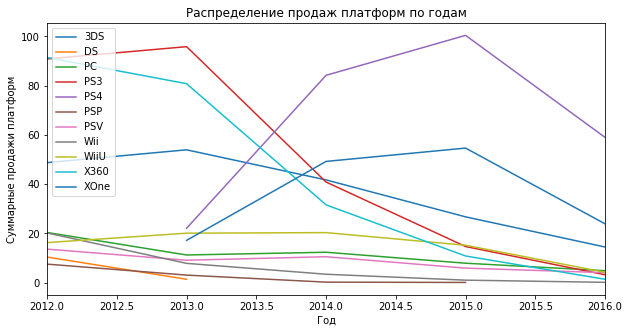

In [34]:
period_data_good2=data_good.query('2011<year_of_release').groupby(['year_of_release', 'platform'])['all_sales'].sum() #делаем срез по условию '2011<year_of_release'
                                #группируем таблицу по 'year_of_release', 'platform' и результат записываем в новый дф
period_data_good2.unstack().plot(figsize=(10,5)) #спомощью функции unstack - избавляемся от уровня и добавляет его к столбцам, строим график
plt.legend(loc='upper left')
plt.title('Распределение продаж платформ по годам')
plt.xlabel("Год")
plt.ylabel("Суммарные продажи платформ")

К середине 2016 года суммарные продажи, рассматриваемых в рамках данной работы платформ, падали. На графике отчетливо виден нисходящий тренд по всем платформам.


### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат
<a id="ящик"></a>

Text(0, 0.5, 'Суммарные продажи платформы')

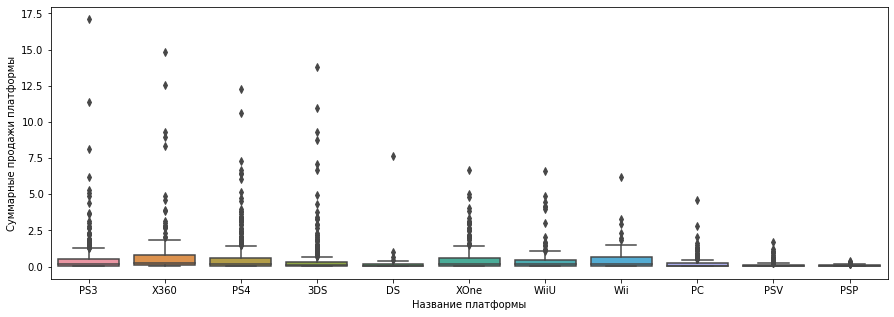

In [35]:
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = 'platform', y = 'all_sales', data = data.query('2011<year_of_release'), ax=ax)
plt.xlabel("Название платформы")
plt.ylabel("Суммарные продажи платформы")

Рассмотрим подробнее, ограничев ось у значением 2 млн проданных копий.

Text(0, 0.5, 'Суммарные продажи платформы')

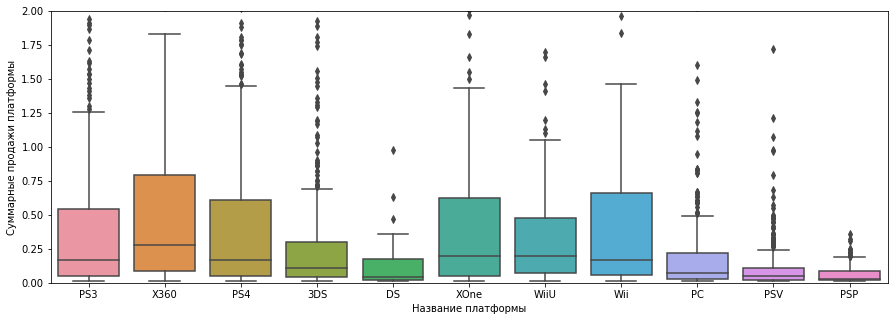

In [36]:
fig, ax = plt.subplots(figsize =(15,5))
sns.boxplot(x = 'platform', y = 'all_sales', data = data.query('2011<year_of_release'), ax=ax)
plt.ylim(0, 2)
plt.xlabel("Название платформы")
plt.ylabel("Суммарные продажи платформы")

Для всех платформ характерно следующее:
 - медиана не превышает 0,25 млн. продаж копий,  
 - медиана смещена к первому квартилю;
 - верний ус длинее нижнего;
 - есть выбросы;
 - данные не симметричны.
 
У платформ  PS4,  XOne и Wii примерно одинаковый межквартильный размах и медианы очень близки друг к другу приблизительно 0,20 млн. копий.
3 квартиль заканчивается примерно 0.6 млн. копий, максимальное количество продаж в районе 1,4 млн. копий.

Наибольшее максимальное значение по количесву продаж копий у платформы Х360 приблизительно 1,87 млн. копий.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
<a id="корреляция"></a>

Рассмотрим самую продаваемую платформу последнего времени (2016 г) - PS4.

Text(0, 0.5, 'Суммарные продажи платформы PS4')

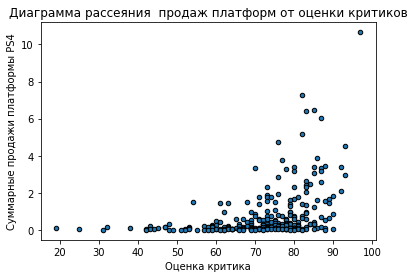

In [37]:
data_platform_PS4=period_data.query('platform == "PS4"& critic_score!=101 & user_score !=11') #делаем срез по 'platform == "PS4"', результат записываем в новый дф data_platform_PS4
data_platform_PS4.plot(x="critic_score", y="all_sales", kind="scatter", ec='black')#строим диаграмму рассеяния
#data_platform_PS4
plt.title('Диаграмма рассеяния  продаж платформ от оценки критиков')
plt.xlabel("Оценка критика")
plt.ylabel("Суммарные продажи платформы PS4")

Повышение оценки критиков увеличивает уровень продаж игр. Наблюдается слабая положительная корреляция.

Text(0, 0.5, 'Суммарные продажи платформы PS4')

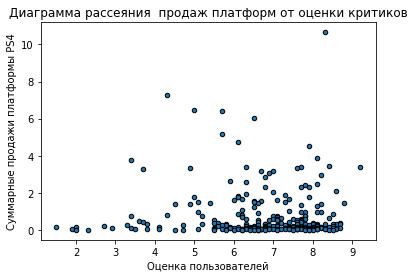

In [38]:
data_platform_PS4.plot(x="user_score", y="all_sales", kind="scatter", ec='black')#строим диаграмму рассеяния
plt.title('Диаграмма рассеяния  продаж платформ от оценки критиков')
plt.xlabel("Оценка пользователей")
plt.ylabel("Суммарные продажи платформы PS4")

Можно сказать, что тенденция сохраняется. Чем выше оценка пользователя, тем охотнее покупают компьютерную игру. Но корреляции почти нет. Все большинство точки расположилось в ряд в диапозоне значений около нуля по оси ординат.

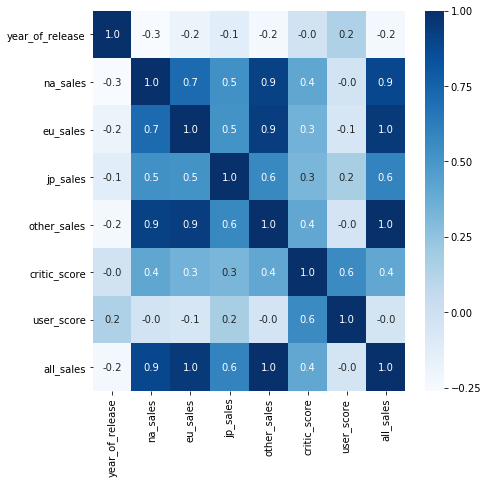

In [39]:
plt.figure(figsize=(7,7))
sns.heatmap(data_platform_PS4.corr(), annot=True, cmap="Blues", fmt='.1f')#подсчитываем корреляцию

In [40]:
data_platform_PS4[['critic_score', 'user_score', 'all_sales']].corr()

,critic_score,user_score,all_sales
critic_score,1.000000,0.557654,0.405223
user_score,0.557654,1.000000,-0.032923
all_sales,0.405223,-0.032923,1.000000


Корреляция между оценками критиков и общей продажей компьютерных игр положительная, составляет 0,4. И остается примерно такой же не зависимо от региона где продаются игры.
Между оценками пользователями и общей продажей корреляция равна 0. В Японии на продажи компьютерных игр оказывает слабое влияние отзывы играков. В этом регионе корреляция положительная, равна 0,2. Северная Америка, Европа и другие регионы не обращают внимания на отзывы пользователь при покупке игры..

Апроксимируя вывод по платформе PS4 на другие платформы можно сказать, что на продажи небольшое влияние оказывают оценки критиков, а в Японии еще и оценки пользователей.
Максимальные объемы продаж новых игр недостигают аналогичных продаж периода с 2008 по 2012 гг.
С 2015 г. по продажам наблюдается нисходящий тренд.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
<a id="жанр"></a>

In [41]:
data_gerge= period_data.pivot_table(index='genre', values=['name', 'all_sales'],aggfunc=({'name':'count','all_sales':['mean','sum']}))#группируем таблицу period_data по 'genre', 
                        # результать записываем в новый дф data_gerge
data_gerge.columns=['mean','sum', 'count'] #переименовываем названия столбцов

data_gerge.sort_values(by='sum', ascending=False)#сортируем получившуюся таблицу в порядке убывания

,mean,sum,count
genre,,,
Action,0.412767,983.21,2382
Sports,0.552425,697.16,1262
Shooter,0.856676,631.37,737
Misc,0.396225,496.47,1253
Role-Playing,0.482560,480.63,996
Racing,0.461779,259.52,562
Platform,0.738441,251.07,340
Simulation,0.331419,200.84,606
Fighting,0.400847,165.55,413


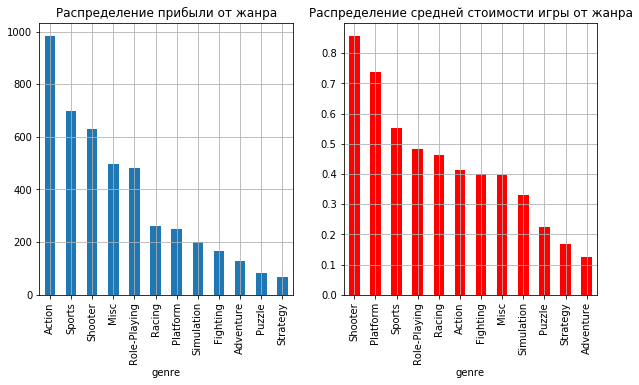

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(25,6))
period_data.groupby('genre')['all_sales'].sum().sort_values(ascending=False).plot(x='genre',y='all_sales', kind='bar',  grid=True,figsize=(10,5),  ax=axes[0],
                    title='Распределение прибыли от жанра')# группируем таблицу data
                    #по параметру 'genre
                    # строим график    
period_data.groupby('genre')['all_sales'].mean().sort_values(ascending=False).plot(x='genre',y='all_sales', kind='bar',  grid=True,figsize=(10,5), color='r', 
                    ax=axes[1], title='Распределение средней стоимости игры от жанра')

По жанрам пятерка самых прибыльных игр расположилась в следующем порядке: Action, Sports, Shooter, Misc, Role-Playing.
Максимальная сумма выручки в 15 раз больше, чем минимальная сумма полученая от продажи игр взависимости от жанра. 

Пятерка топовых жанровых игр взависимости от средней цены выглядит следующим образом: Shooter, Platform, Sports, Role-Playing и Racingю Разница между самой дорогой и самой дешевой игрой в рассматриваемой работе составляет 0,73 млн. проданных копий.

## Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?Проведите исследовательский анализ данных
<a id="регион"></a>

,mean,sum,count
platform,,,
X360,0.485041,588.84,1214
Wii,0.378593,486.87,1286
PS3,0.298721,390.13,1306
DS,0.163714,323.99,1979
PS2,0.142720,114.89,805


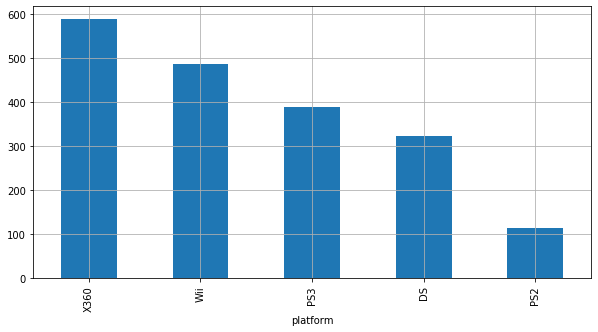

In [43]:
data_na= period_data.pivot_table(index='platform', values=['name', 'na_sales'],aggfunc=({'name':'count','na_sales':['mean','sum']}))#группируем таблицу
data_na.columns=['mean', 'sum', 'count']#переименовываем название столбцов 
 
display(data_na.sort_values(by='sum', ascending=False).head(5),
        period_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5).plot(x='platform',y='na_sales', kind='bar',  grid=True,figsize=(10,5))
       )#выводим на экран отсоритованную таблицу и построенный график


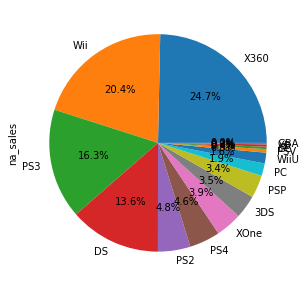

In [44]:
period_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(y='na_sales', kind='pie',   autopct='%1.1f%%', grid=True, figsize=(10,5))

Самые популярные платформы в Северной Америке: X360,  Wii, PS3, DS и PS2. Для платформы X360 доля всех продаж составляет 24,7%, Wii - 20,4%.

,mean,sum,count
platform,,,
PS3,0.250544,327.21,1306
X360,0.220667,267.89,1214
Wii,0.200871,258.32,1286
DS,0.072254,142.99,1979
PS4,0.359923,141.09,392


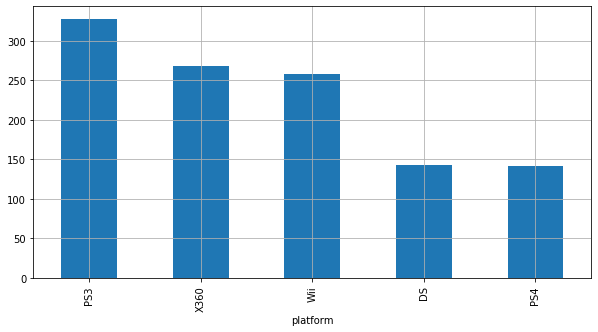

In [45]:
data_eu= period_data.pivot_table(index='platform', values=['name', 'eu_sales'],aggfunc=({'name':'count','eu_sales':['mean','sum']}))
data_eu.columns=['mean', 'sum', 'count']

display(data_eu.sort_values(by='sum', ascending=False).head(5),
        period_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(x='platform',y='eu_sales', kind='bar',  grid=True,figsize=(10,5))
       )

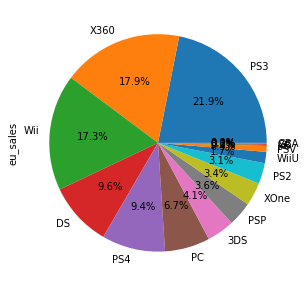

In [46]:
period_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(y='eu_sales', kind='pie',   autopct='%1.1f%%', grid=True, figsize=(10,5))

В Европе пятерка топовых платформ отличается от Северной Америки - PS3,  X360, Wii, DS и PS.
Лидером в долях продаж является  PS3  около 22%,  X360 и Wii около 17,5%,  DS и PS - 9,5 %.

,mean,sum,count
platform,,,
DS,0.071496,141.49,1979
3DS,0.196523,100.62,512
PS3,0.060804,79.41,1306
PSP,0.065217,70.63,1083
Wii,0.053095,68.28,1286


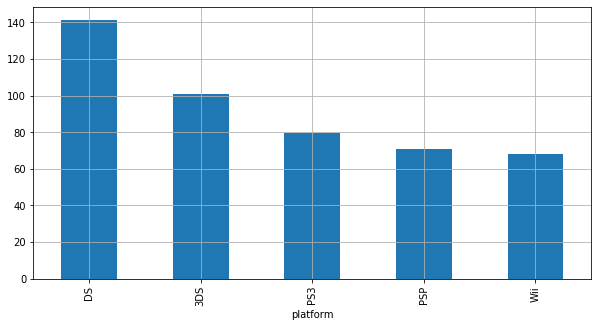

In [47]:
data_jp= period_data.pivot_table(index='platform', values=['name', 'jp_sales'],aggfunc=({'name':'count','jp_sales':['mean','sum']}))
data_jp.columns=['mean', 'sum', 'count']

display(data_jp.sort_values(by='sum', ascending=False).head(5),
        period_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(x='platform',y='jp_sales', kind='bar',  grid=True,figsize=(10,5))
       )

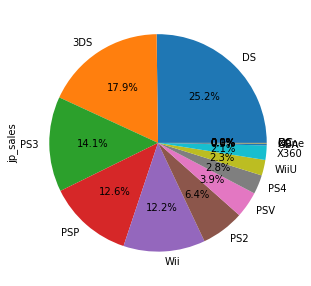

In [48]:
period_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(y='jp_sales', kind='pie',   autopct='%1.1f%%', grid=True, figsize=(10,5))

DS, 3DS, PS3, PSP, Wii	 - первая пятерка популярных платформ в Японии.
Доля на рынке для самой продаваемой платформы DS не превышает 25,2%, 3DS, PS3 - 17,9 и 14,1% соответственно, PSP - 12,6% и Wii- 12,2% от общего суммы получаемой от продажи платформ в Японии.

In [49]:
data_na= period_data.pivot_table(index='genre', values=['name', 'na_sales'],aggfunc=({'name':'count','na_sales':['mean','sum']}))
data_na.columns=['mean', 'sum', 'count']
data_na.sort_values(by='sum', ascending=False).head(5)
display(data_na.sort_values(by='sum', ascending=False).head(5))

,mean,sum,count
genre,,,
Action,0.222687,530.44,2382
Sports,0.314295,396.64,1262
Shooter,0.506282,373.13,737
Misc,0.227502,285.06,1253
Role-Playing,0.200432,199.63,996


In [50]:
data_eu= period_data.pivot_table(index='genre', values=['name', 'eu_sales'],aggfunc=({'name':'count','eu_sales':['mean','sum']}))
data_eu.columns=['mean', 'sum', 'count']
display(data_eu.sort_values(by='sum', ascending=False).head(5))

,mean,sum,count
genre,,,
Action,0.147229,350.70,2382
Sports,0.199326,251.55,1262
Shooter,0.324138,238.89,737
Misc,0.117223,146.88,1253
Racing,0.201762,113.39,562


In [51]:
data_jp= period_data.pivot_table(index='genre', values=['name', 'jp_sales'],aggfunc=({'name':'count','jp_sales':['mean','sum']}))
data_jp.columns=['mean','sum', 'count']
display(data_jp.sort_values(by='sum', ascending=False).head(5))

,mean,sum,count
genre,,,
Role-Playing,0.171064,170.38,996
Action,0.042851,102.07,2382
Misc,0.051500,64.53,1253
Sports,0.038803,48.97,1262
Platform,0.103529,35.20,340


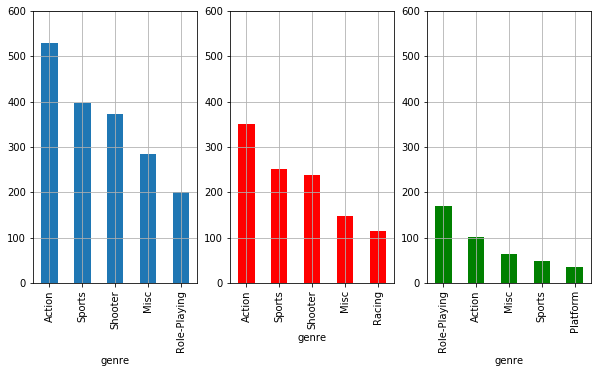

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))
period_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(x='genre', y='na_sales', ylim=(0,600), kind='bar',  grid=True,figsize=(10,5),  ax=axes[0])
period_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(x='genre', y='eu_sales', ylim=(0,600), kind='bar',  grid=True,figsize=(10,5), color='r', 
                                                                                   ax=axes[1])
period_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(x='genre', y='jp_sales', ylim=(0,600), kind='bar',  grid=True,figsize=(10,5), color='g',  ax=axes[2])

По жанрам распределение идет неодинаково. В Северной Америке и Европе лидируют Action и Sports, тогда как в Японии они занимают вторую и третью строчки популярности. На первой строчке расположилась игра - Role-Playing. А вот закрывает пятерку самых популярных игр в трех регионах одна и таже игра - Misc.
Самые большие сборы от продажи игр приходятся на Северную Америку, самые маленькие - в Японии.

In [53]:
period_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'all_sales'],aggfunc=('sum'))

,all_sales,eu_sales,jp_sales,na_sales
rating,,,,
E,1378.43,461.09,120.36,796.98
E10+,525.32,173.35,36.57,315.40
EC,1.32,0.00,0.00,1.32
M,1017.02,398.90,43.79,574.33
RP,0.03,0.03,0.00,0.00
T,743.48,235.44,83.90,424.14
no_mark,778.38,227.19,276.69,274.50


Text(0, 0.5, 'Количество продаж')

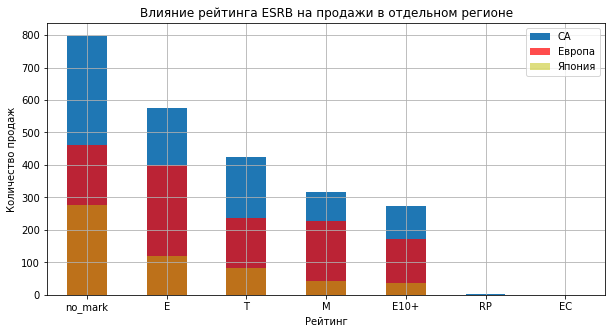

In [54]:
period_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(x='rating',y='na_sales', kind='bar',  rot=0, grid=True,figsize=(10,5))
period_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(x='rating',y='eu_sales', kind='bar',  rot=0, grid=True,figsize=(10,5), color='r', alpha=0.7)
period_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(x='rating',y='jp_sales', kind='bar',  rot=0, grid=True,figsize=(10,5), color='y', alpha=0.5)
plt.title('Влияние рейтинга ESRB на продажи в отдельном регионе')
plt.legend(['СА', 'Европа',  'Япония'])
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")

Чем выше рейтинг ESRB, тем активнее покупают компьютерную игру. Влияние рейтинга ESRB на продажи в С.Америке объясняется тем, что рейтинги ESRB дейтвительны в США и Канаде, и большинство игровых издателей с уважением относятся к этой организации. Помимо ESRB, существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии. 
По продажам рейтинги расположились в следующем порядке убывания: «E» — «Для всех», «T» — «Подросткам 13—19 лет», «M» — «От 17 лет», «E10+» — «Для всех старше 10 лет». 

## Проверим гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

<a id="гипотеза"></a>

Нулевая гипотеза H₀: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Исходя из H₀ формулируется альтернативная гипотеза H₁: 
- Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [55]:
data_Xbox=period_data.query('platform == "XOne"&  user_score !=11')

In [56]:
data_PC=period_data.query('platform == "PC"& user_score !=11')

In [57]:
variance_estimate = np.var(data_Xbox['user_score'], ddof=1)#известно, что датасет — не вся совокупность, а выборка из неё,поэтому указываем параметр ddof=1
print('дисперсия выборки для платформы XOne:', variance_estimate) 
variance_estimate = np.var(data_PC['user_score'], ddof=1)
print('дисперсия выборки для платформы PC:', variance_estimate) 

дисперсия выборки для платформы XOne: 1.9069968
дисперсия выборки для платформы PC: 2.3152337


Дисперсии не равны друг другу, следовательно выборки тоже разные, поэтому указываем параметр equal_var = False.

In [58]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу


results = st.ttest_ind(data_Xbox['user_score'], data_PC['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.010140061909137556
Отвергаем нулевую гипотезу


In [59]:
print('средний пользовательский рейтинг платформы Xbox One:', data_Xbox['user_score'].mean())
print('средний пользовательский рейтинг платформы PC:', data_PC['user_score'].mean())

средний пользовательский рейтинг платформы Xbox One: 6.521428
средний пользовательский рейтинг платформы PC: 6.8300815


Отвергаем H₀ средние пользовательские рейтинги платформ Xbox One и PC различаются.

- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H₀: 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
Исходя из H₀ формулируется альтернативная гипотеза H₁: 
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [60]:
data_Action=period_data.query('genre == "Action" &  user_score !=11')

In [61]:
data_Sports=period_data.query('genre == "Sports" & user_score !=11')

In [62]:
variance_estimate = np.var(data_Sports['user_score'], ddof=1)#известно, что датасет — не вся совокупность, а выборка из неё,поэтому указываем параметр ddof=1
print('дисперсия выборки для жанра игр Action:', variance_estimate) 
variance_estimate = np.var(data_Action['user_score'], ddof=1)#известно, что датасет — не вся совокупность, а выборка из неё,поэтому указываем параметр ddof=1
print('дисперсия выборки для жанра игр Sports:', variance_estimate) 

дисперсия выборки для жанра игр Action: 2.7323077
дисперсия выборки для жанра игр Sports: 1.8595806


Дисперсии разные, поэтому указываем параметр equal_var = False.

In [63]:
alpha = 0.01  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу


results = st.ttest_ind(data_Action['user_score'], data_Sports['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.318778032412661e-10
Отвергаем нулевую гипотезу


In [64]:
print('средний пользовательский рейтинг жанра Action (англ. «действие», экшен-игры)', data_Action['user_score'].mean())
print('средний пользовательский рейтинг жанра Sports (англ. «спортивные соревнования»):', data_Sports['user_score'].mean())

средний пользовательский рейтинг жанра Action (англ. «действие», экшен-игры) 6.878626
средний пользовательский рейтинг жанра Sports (англ. «спортивные соревнования»): 6.41642


Нулевую гипотезу отвергаем, т.к. средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Общий вывод
<a id="вывод"></a>

1. Выявлено, что после 2014 года новых платформ не выпускалось. После 2015 года продажи компьютерных игр начали падать - нисходящий тренд.
Новые игры, которые выпустили в 2013 году уже через два года прошли пик продаж. Платформы исчезнут быстрее, чем средний показатель полного исчезновения платформы - 10 лет.
2. На 2016 г самыми прибыльными играми являются PS4, Xone, 3DS.
3. Определены популярные платформы и жанры в регионах

| Регион        | Платформа          | Жанр  | 
|:------------------:|:----------------------------------:|: ------------------------------:|
| Северная Америка            | X360, Wii, PS3, DS и PS2 | Action, Sports, Shooter, Misc, Role-Playing |  
| Европа   | PS3,  X360, Wii, DS и PS      |  Action, Sports, Shooter,  Misc, Racing  |  
| Япония   | DS, PS, PS2, SNES, 3DS     |   Role-Playing, Action, Misc, Sports, Platform | 


4. Доля продаж самой популярной платформы не превышает 25% от общего количества продаж взависимости от региона. Общая доля пяти самых популярных платформ составляет около 82 % от общего количества продаж.
5. Определено влияние оценок критиков и пользователей на продажи игр. Коэффициент  корреляции Пирсона равен 0, поэтому оценки пользователей не влияют на продажи игр. В то же время оценки критиков оказывают слабое влияние на продажи, коэффициент корреляции равен 0,4.
5. Рейтинг ESRB оказывает разное влияние на продажи компьютерных игр взависимости от региона. Более высокое влияние рейтинга ESRB на продажи в С.Америке объясняется тем, что рейтинги ESRB дейтвительны в США и Канаде. Но не зависимо от региона, если рейтинг ESRB высокий - компьютерную игру покупают активнее. По продажам рейтинги расположились в следующем порядке убывания: «E» — «Для всех», «T» — «Подросткам 13—19 лет», «M» — «От 17 лет», «E10+» — «Для всех старше 10 лет».
6. Проверены гипотезы

| Нуливая гипотеза        | Результат          | 
|:------------------:|:----------------------------------:|
| Средние пользовательские рейтинги платформ Xbox One и PC одинаковые   | Отвергаем нулевую гипотезу | 
| Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые  | Отвергаем нулевую гипотезу   |    

## Чек-лист готовности проекта
<a id="лист"></a>

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] открыт файл с данными и изучена общая информация
- [x] заменины названия столбцов
- [x] преобразованы данные в нужные типы. Описано, в каких столбцах заменили тип данных и почему
- [x] обработаны пропуски при необходимости
- [x] посчитаны суммарные продажи во всех регионах и записаны  в отдельный столбец
- [x] выяснено , сколько игр выпускалось в разные годы. Определен важный периоды
- [x] исследовано, как менялись продажи по платформам. Выбраны платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x] определены платформы лидирущие по продажам
- [x] выбраны несколько потенциально прибыльных платформ
- [x] построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описан результат.
- [x] выявлено влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построены диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- [x] рассмотрено общее распределение игр по жанрам. 
- [x] определи для пользователя каждого региона (NA, EU, JP): самые популярные платформы (топ-5).  Опишите различия в долях продаж.
- [x] определи для пользователя каждого региона (NA, EU, JP):  самые популярные жанры (топ-5). Поясните разницу.
- [x] определи для пользователя каждого региона (NA, EU, JP): влияет ли рейтинг ESRB на продажи в отдельном регионе
- [x] проверена гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x] проверена гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- [x] задана самостоятельно пороговое значение alpha.
- [x] пояснено: как формулировали нулевую и альтернативную гипотезы; какой критерий применили для проверки гипотез и почему
- [x] в каждом этапе есть выводы
- [x] написан общий вывод